In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [5]:
data.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data['sex'].value_counts()
data.replace({'sex':{'male':1,'female':0}},inplace=True)

In [11]:
data['smoker'].value_counts()
data.replace({'smoker':{'yes':1,'no':0}},inplace=True)

In [13]:
data['region'].value_counts()
data.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [14]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,0,16884.92400
1,1,18,1,33.770,1,0,1,1725.55230
2,2,28,1,33.000,3,0,1,4449.46200
3,3,33,1,22.705,0,0,2,21984.47061
4,4,32,1,28.880,0,0,2,3866.85520


In [16]:
data.shape

(1338, 8)

In [17]:
data.describe()

,index,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,386.391641,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,0.000000,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,334.250000,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,668.500000,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,1002.750000,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,1337.000000,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


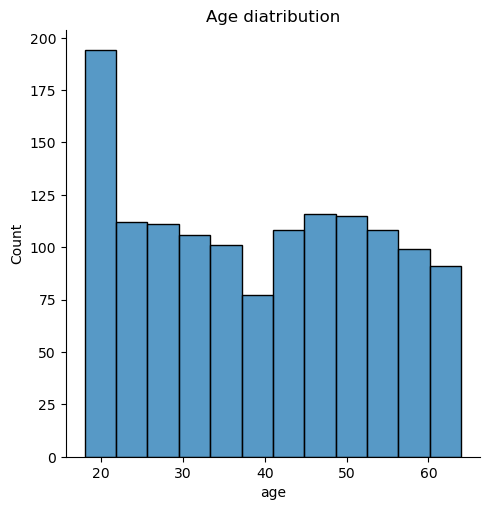

In [20]:
#plt.figure(figswize=(10,10))
sns.displot(data['age'])
plt.title('Age diatribution')
plt.show()

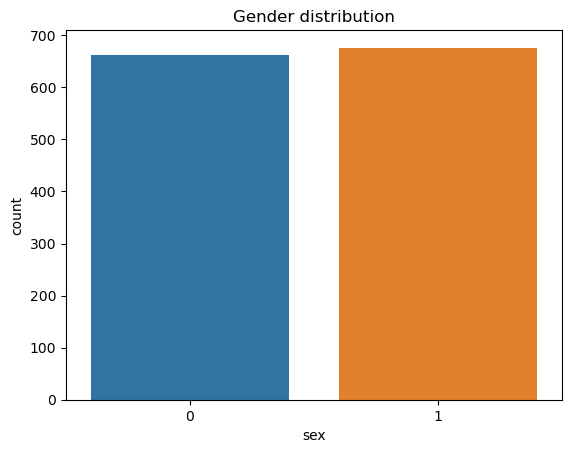

In [21]:
sns.countplot(x='sex',data=data)
plt.title('Gender distribution')
plt.show()

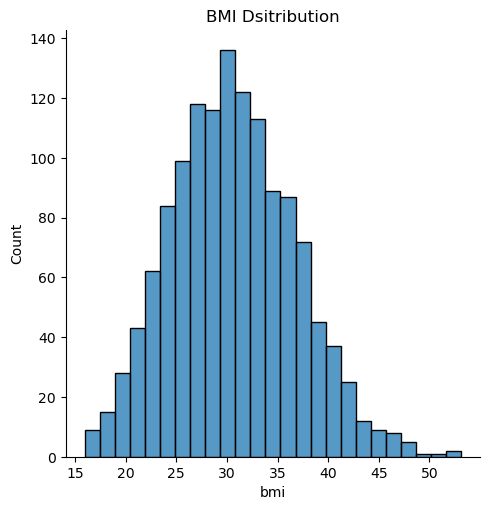

In [22]:
sns.displot(data['bmi'])
plt.title('BMI Dsitribution')
plt.show()

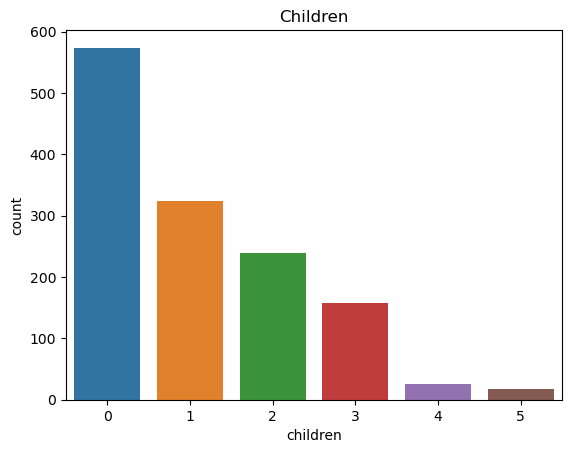

In [23]:
sns.countplot(x='children',data=data)
plt.title('Children')
plt.show()

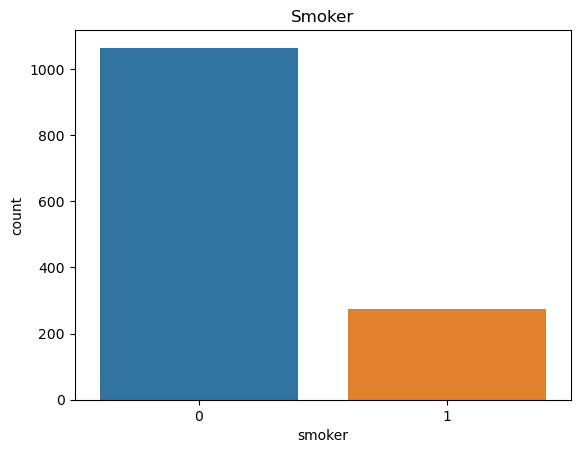

In [24]:
sns.countplot(x='smoker',data=data)
plt.title('Smoker')
plt.show()

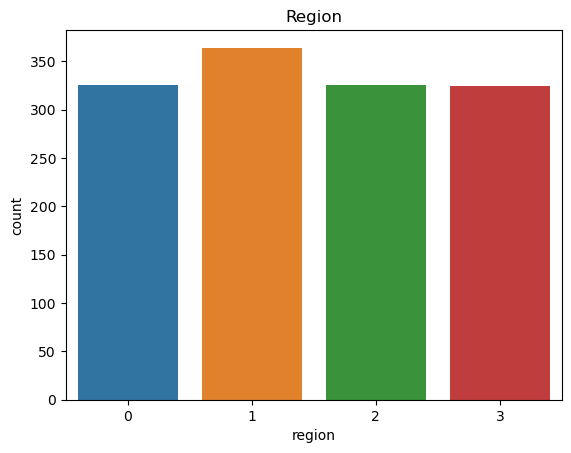

In [25]:
sns.countplot(x='region',data=data)
plt.title('Region')
plt.show()

In [27]:
X = data.drop(['charges'],axis=1)
Y = data['charges']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=1,test_size=0.2)

In [33]:
model = LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
tr_pred = model.predict(x_train)
tr_eval  =metrics.r2_score(y_train,tr_pred)
print(tr_eval)

0.7475655312462315


In [37]:
ts_pred = model.predict(x_test)
ts_eval = metrics.r2_score(y_test,ts_pred)
print(ts_eval)

0.7624223827359451
